In [1]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB

In [2]:
#Load Data
data_train = pd.read_csv("drugsComTrain_raw.csv")
data_test=pd.read_csv("drugsComTest_raw.csv")
data=pd.concat([data_train,data_test])

In [3]:
data.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


In [4]:
import re
def clean(x):
    x = re.sub("wouldn't",'would not',x)
    x = re.sub("they've",'they have',x)
    x = re.sub("should've",'should have',x)
    x = re.sub("could've",'could have',x)
    x = re.sub("can't",'can not',x)
    x = re.sub("couldn't",'could not',x)
    x = re.sub("didn't",'did not',x)
    x = re.sub("do've",'do have',x)
    
    #to remove html tags
    x = re.sub(r'<.*?>', '', x)
    
    #to remove everything except alphabets
    x = re.sub(r'[^a-zA-Z]',' ',x)

    return x.lower() #lowercase

In [5]:
# Drop unnecessary ', 'condition', 'dacolumns
data.drop(['drugName', 'usefulCount'], axis=1, inplace=True)

# Replace ratings with sentiment labels
data['sentiment'] = np.where(data['rating']>=6, 1, 0)
data.drop(['rating'], axis=1, inplace=True)

#data cleaning
data['review'] = data.review.apply(clean)



# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['review'], data['sentiment'], test_size=0.2, random_state=42)


In [6]:
# Extract features using TF-IDF
tfidf = TfidfVectorizer(stop_words='english')
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


In [7]:
data.head()

,uniqueID,condition,review,date,sentiment
0,206461,Left Ventricular Dysfunction,it has no side effect i take it in combinati...,20-May-12,1
1,95260,ADHD,my son is halfway through his fourth week of ...,27-Apr-10,1
2,92703,Birth Control,i used to take another oral contraceptive wh...,14-Dec-09,0
3,138000,Birth Control,this is my first time using any form of birth...,3-Nov-15,1
4,35696,Opiate Dependence,suboxone has completely turned my life around...,27-Nov-16,1


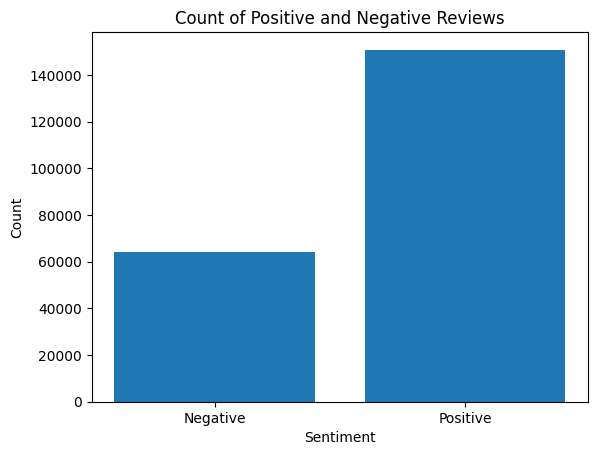

In [8]:
import matplotlib.pyplot as plt

# Calculate the count of positive and negative reviews
sentiment_count = data['sentiment'].value_counts()

# Plot a bar graph to show the count of positive and negative reviews
plt.bar(['Negative', 'Positive'], [sentiment_count[0], sentiment_count[1]])
plt.title('Count of Positive and Negative Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

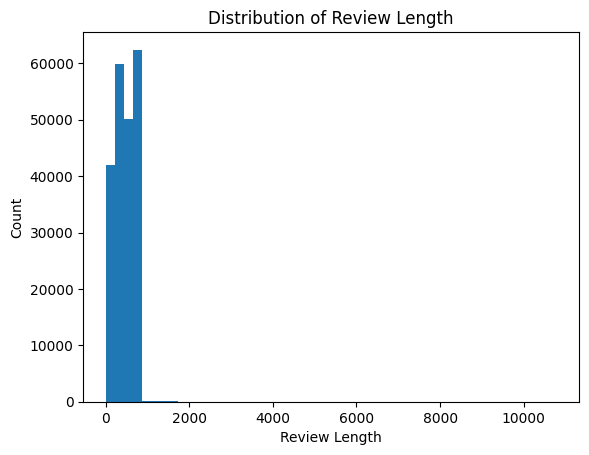

In [9]:
# Calculate the length of each review
review_length = data['review'].apply(len)

# Plot a histogram to show the distribution of review length
plt.hist(review_length, bins=50)
plt.title('Distribution of Review Length')
plt.xlabel('Review Length')
plt.ylabel('Count')
plt.show()


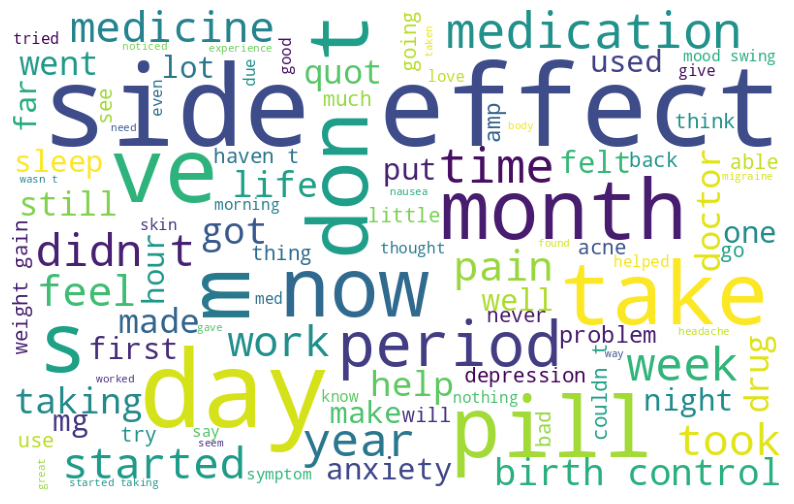

In [10]:
from wordcloud import WordCloud

# Join all the reviews into a single string
reviews = ' '.join(data['review'])

# Generate wordcloud using the joined reviews string
wordcloud = WordCloud(width=800, height=500, background_color='white', max_words=100).generate(reviews)

# Plot the wordcloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


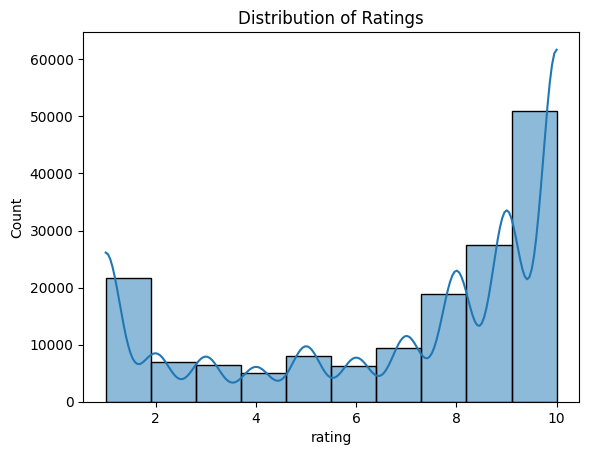

In [11]:
import seaborn as sns

sns.histplot(data_train, x="rating", bins=10, kde=True)
plt.title('Distribution of Ratings')
plt.show()


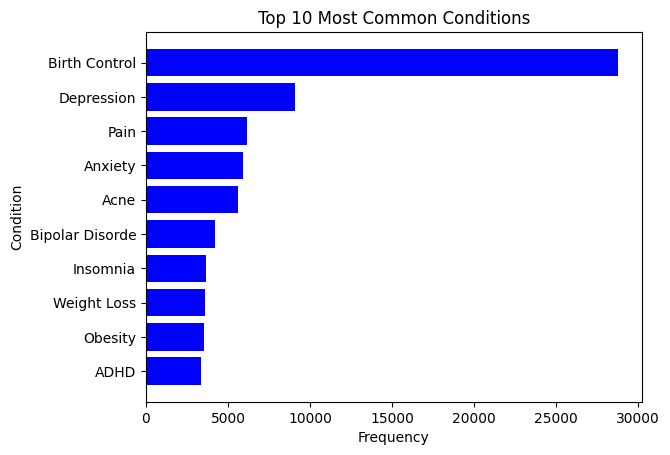

In [12]:
import matplotlib.pyplot as plt
import pandas as pd


top_conditions = data_train['condition'].value_counts().nlargest(10)
plt.barh(top_conditions.index, top_conditions.values, color='blue')
plt.gca().invert_yaxis()
plt.xlabel('Frequency')
plt.ylabel('Condition')
plt.title('Top 10 Most Common Conditions')
plt.show()


/tmp/ipykernel_7415/2499375874.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data_train.corr()


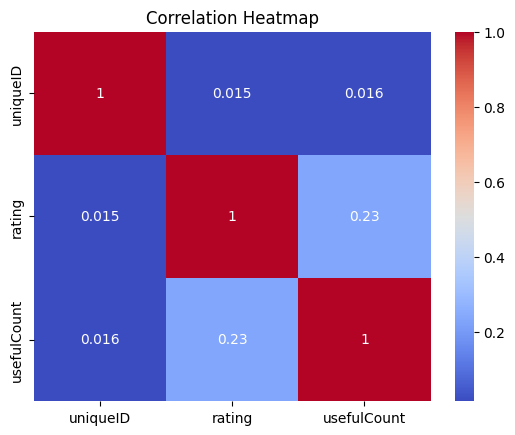

In [13]:

# Plot a heatmap of the correlation between numerical features
corr = data_train.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

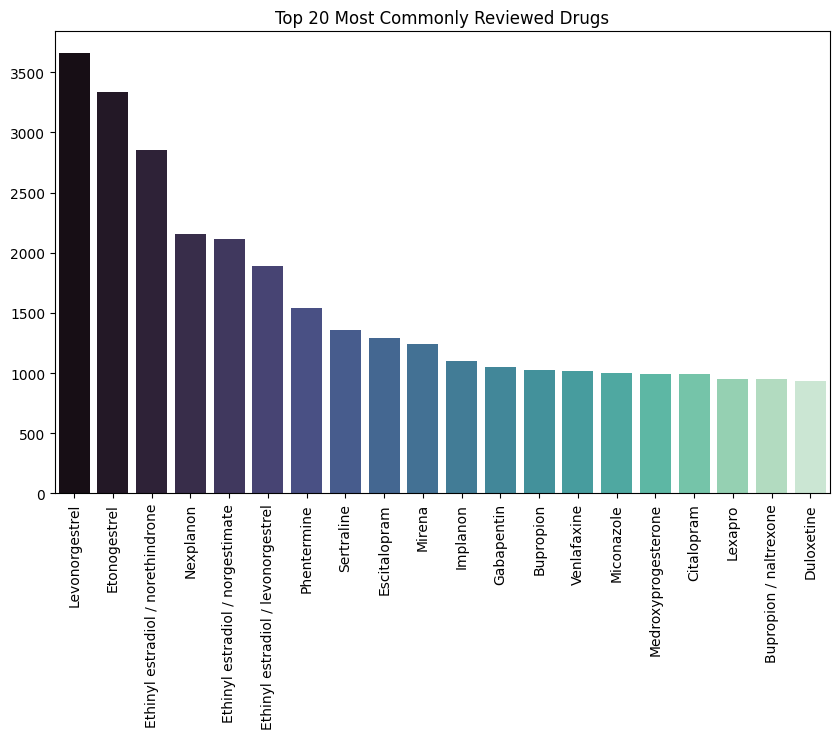

In [14]:
top_drugs = data_train['drugName'].value_counts().nlargest(20)

plt.figure(figsize=(10,6))
sns.barplot(x=top_drugs.index, y=top_drugs.values, palette='mako')
plt.title('Top 20 Most Commonly Reviewed Drugs')
plt.xticks(rotation=90)
plt.show()


/tmp/ipykernel_7415/2399604534.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data_train['rating'], shade=True)


<Axes: xlabel='rating', ylabel='Density'>

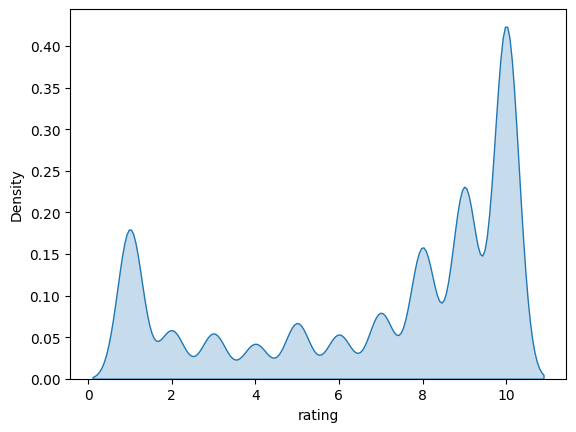

In [15]:
sns.kdeplot(data_train['rating'], shade=True)


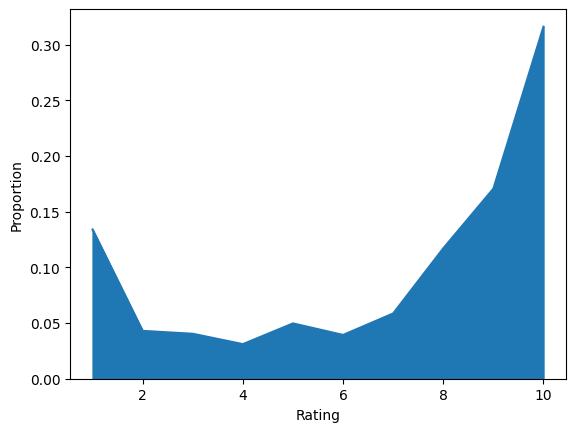

In [16]:
import pandas as pd
import matplotlib.pyplot as plt


data_train['rating'].value_counts(normalize=True).sort_index().plot.area()
plt.xlabel('Rating')
plt.ylabel('Proportion')
plt.show()


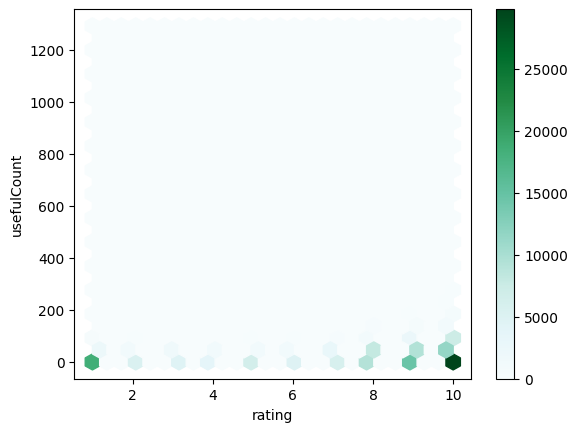

In [17]:
import pandas as pd
import matplotlib.pyplot as plt


data_train.plot.hexbin(x='rating', y='usefulCount', gridsize=25)
plt.show()


In [18]:
# Train Naive Bayes model
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)

# Predict on test data
y_pred_nb = nb.predict(X_test_tfidf)

# Evaluate model performance
acc_nb = accuracy_score(y_test, y_pred_nb)
print("Naive Bayes Accuracy:", acc_nb)


Naive Bayes Accuracy: 0.7671401669262781


In [19]:
#Naive-bayes F1 score
from sklearn.metrics import classification_report
y_true1 = y_test
y_pred1 = y_pred_nb
target_names = ['Negative','Positive']
print(classification_report(y_true1, y_pred1, target_names=target_names))

              precision    recall  f1-score   support

    Negative       0.87      0.26      0.41     12940
    Positive       0.76      0.98      0.86     30073

    accuracy                           0.77     43013
   macro avg       0.82      0.62      0.63     43013
weighted avg       0.79      0.77      0.72     43013



In [20]:
# Train SVM model
svm = SVC(kernel='linear')
svm_history=svm.fit(X_train_tfidf, y_train)

In [21]:
# Predict on test data
y_pred_svm = svm.predict(X_test_tfidf)

In [22]:
# Evaluate model performance
acc_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", acc_svm)

SVM Accuracy: 0.8461162904238253


In [23]:
#SVM F1 score
y_true1 = y_test
y_pred1 = y_pred_svm
target_names = ['Negative','Positive']
print(classification_report(y_true1, y_pred1, target_names=target_names))

              precision    recall  f1-score   support

    Negative       0.78      0.68      0.73     12940
    Positive       0.87      0.92      0.89     30073

    accuracy                           0.85     43013
   macro avg       0.83      0.80      0.81     43013
weighted avg       0.84      0.85      0.84     43013



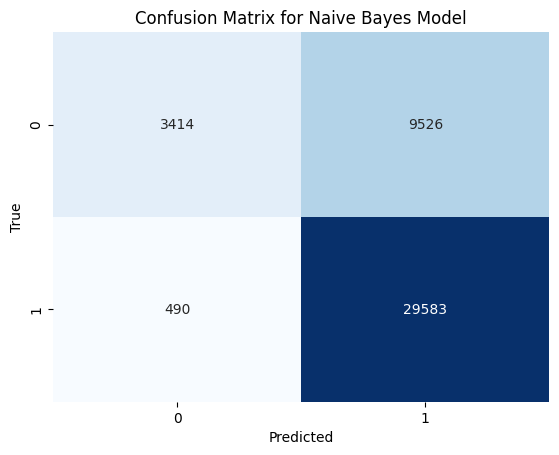

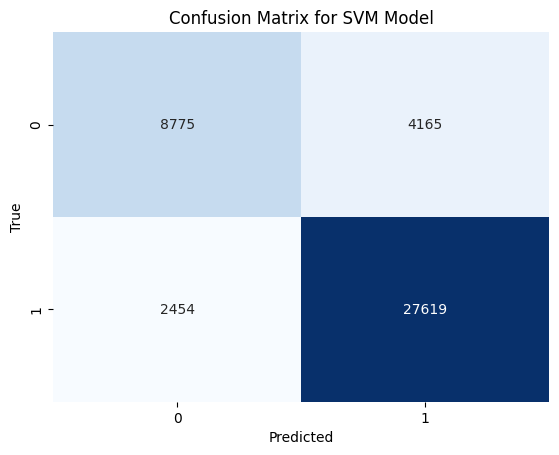

In [24]:
# Plot the confusion matrix for Naive Bayes
from sklearn.metrics import accuracy_score, confusion_matrix
cm_nb = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Naive Bayes Model')
plt.show()

# Plot the confusion matrix for SVM
cm_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for SVM Model')
plt.show()


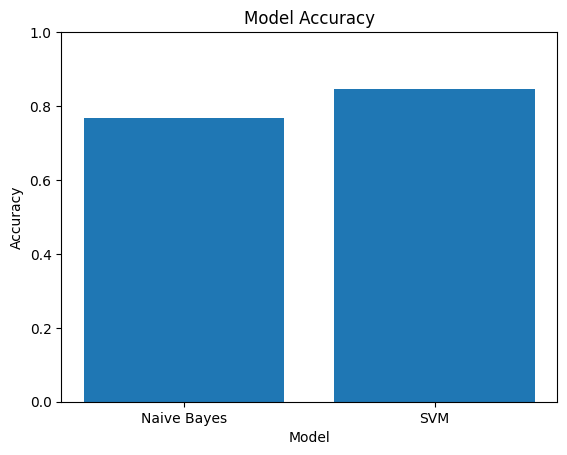

In [31]:
# Plot accuracy graph for both models
from sklearn.metrics import accuracy_score

nb_acc = accuracy_score(y_test, nb.predict(X_test_tfidf))
svm_acc = accuracy_score(y_test, svm_history.predict(X_test_tfidf))
accuracy = [nb_acc, svm_acc]

plt.bar(['Naive Bayes', 'SVM'], accuracy)
plt.ylim(0.0, 1.0)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.show()

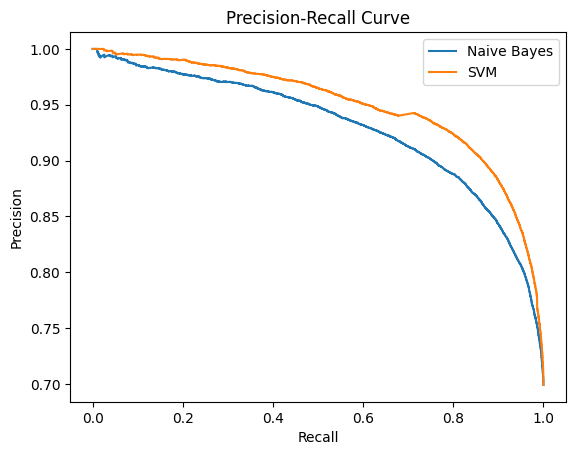

In [25]:
from sklearn.metrics import precision_recall_curve
precision_nb, recall_nb, thresholds_nb = precision_recall_curve(y_test, nb.predict_proba(X_test_tfidf)[:,1])
precision_svm, recall_svm, thresholds_svm = precision_recall_curve(y_test, svm_history.decision_function(X_test_tfidf))

plt.plot(recall_nb, precision_nb, label='Naive Bayes')
plt.plot(recall_svm, precision_svm, label='SVM')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


In [26]:
import pickle
with open('predict_svm.pkl','wb') as f1:
    pickle.dump(svm,f1)

In [27]:
with open('predict_nb.pkl','wb') as f1:
    pickle.dump(nb,f1)

In [28]:
with open('tokenizer.pkl','wb') as f1:
    pickle.dump(tfidf,f1)